# User input

In [16]:
filepath = "/Users/timnoahkempchen/Library/CloudStorage/GoogleDrive-timkem@stanford.edu/Meine Ablage/Datasets/data/22_08_09_CellAtlas_only_Processed_Metadata.csv"
output_dir = "/Users/timnoahkempchen/Downloads/TestFolder/"

sample_column = "sample"
cell_type_column = "Cell Type"
region_column = "unique_region"
x_position_column = "x"
y_position_column = "y"
treatment_column ="consensus diagnosis"

ks = [20, 30, 35] # k=n means it collects n nearest neighbors for each center cell
cluster_col = "Cell Type"

cellhier_path = 'cellhier/'

k = 35
n_neighborhoods = 30
k_centroids = {}



# Load data & functions

In [17]:
import pandas as pd
import numpy as np
from sklearn.neighbors import NearestNeighbors
import time
import sys

from sklearn.cluster import MiniBatchKMeans
import seaborn as sns

import matplotlib.pyplot as plt

sys.path.insert(1, '/Users/timnoahkempchen/Desktop/SAP/Clean_functions/CellAtlas_neighborhood_analysis_110221_YT')
from Cell_atlas_neighborhood_analysis_functions import *

In [6]:
df = pd.read_csv(filepath, index_col=0,header=0, low_memory=False)

In [7]:
df.columns

Index(['CHGA', 'MMP9', 'CD36', 'CK7', 'PDL1', 'Bcatenin', 'Vimentin', 'FoxP3',
       'CD56', 'CD31', 'pH2AX', 'CD90', 'CD15', 'PD1', 'aSMA', 'CD25', 'Ki67',
       'Cytokeratin', 'CD20', 'CD4', 'CD11c', 'AnnexA1', 'Nestin', 'p53',
       'CD73', 'EGFR', 'MUC5AC', 'HLADR', 'COX2', 'BCL2', 'p63', 'CD3', 'MUC2',
       'CD8', 'CD45', 'PGA3', 'CD57', 'CD68', 'aDef5', 'CD34', 'Podoplanin',
       'CD38', 'CD11b', 'CD163', 'MUC1', 'CD138', 'Arginase1', 'PP', 'CD79a',
       'MUC6', 'region', 'x', 'y', 'sample', 'region_num', 'CD206', 'CollIV',
       'unique_region', 'Accession_number', 'Block_ID', 'Sample_type',
       'neigh_name', 'neigh_sub', 'community', 'community common', 'Cell Type',
       'Core Type', 'Accession number', 'Sample', 'Block type',
       'Initial block diagnosis', '% invasive', '%dysplasia',
       '%metaplasia+columnar', '% normal squam mucosa', '% HG dyspalsia',
       '% LG dysplasia', '% Glandular', '% metaplasia', 'consensus diagnosis',
       'Sub diagnosis', '

/Users/timnoahkempchen/Desktop/SAP/Clean_functions/CellAtlas_neighborhood_analysis_110221_YT/Cell_atlas_neighborhood_analysis_functions.py:100: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  df_perc=(st/np.sum(st, axis = 1)[:,None])* 100


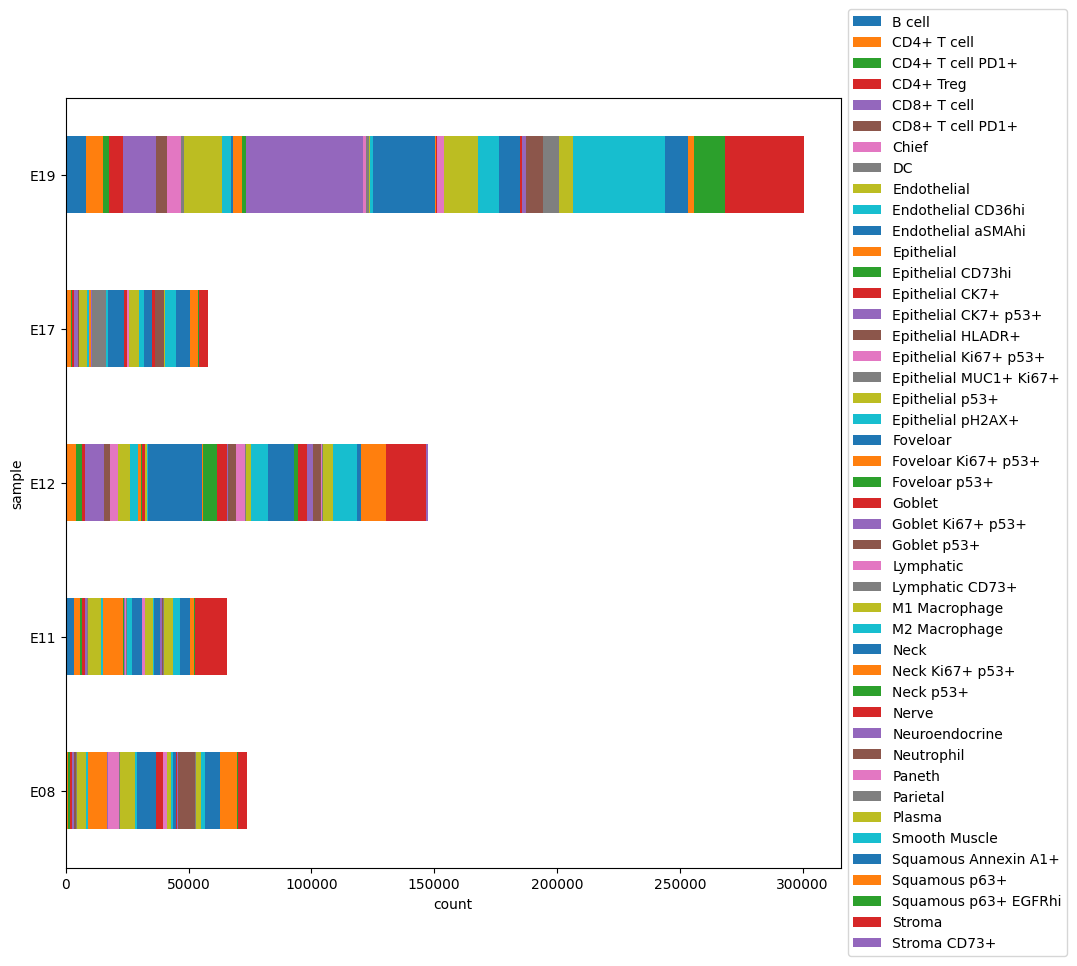

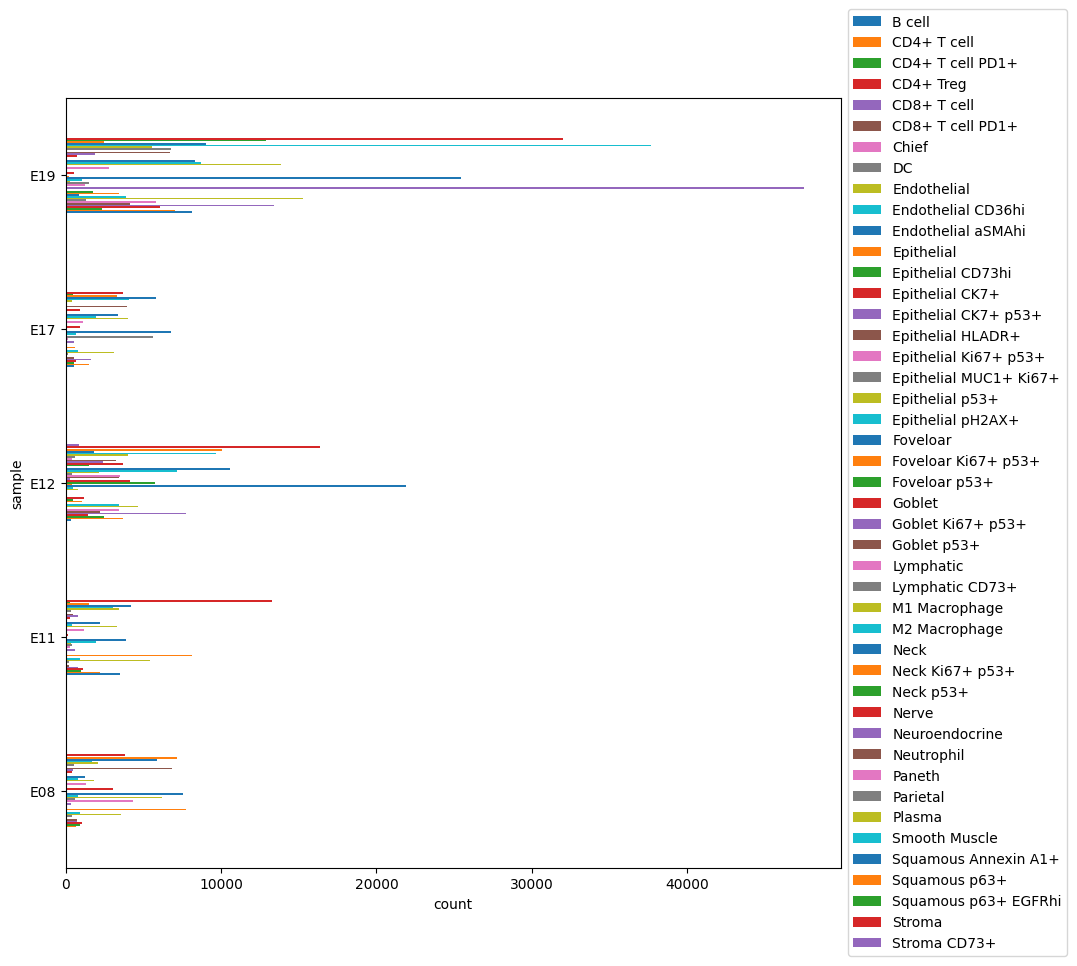

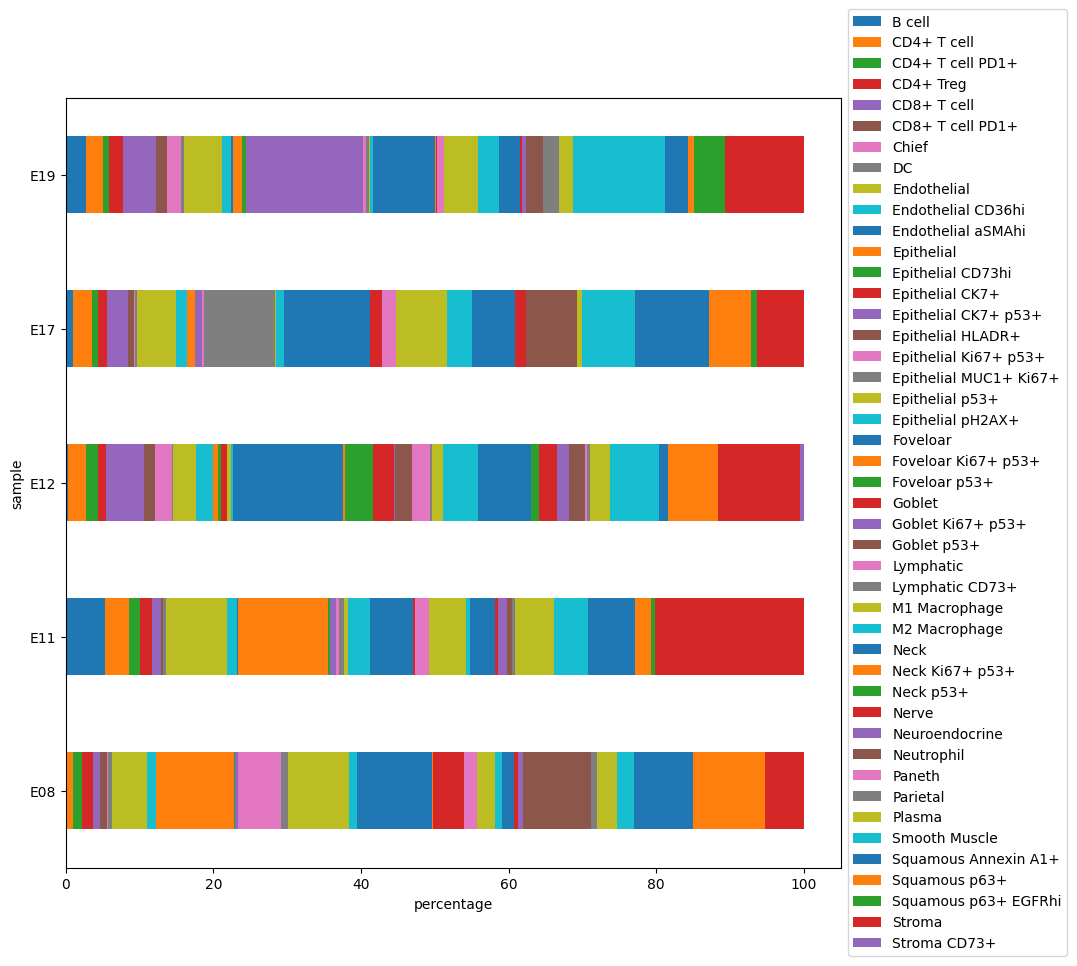

In [8]:
cell_type_composition_vis(df, sample_column = "sample", cell_type_column = "Cell Type", output = output_dir)

/Users/timnoahkempchen/Desktop/SAP/Clean_functions/CellAtlas_neighborhood_analysis_110221_YT/Cell_atlas_neighborhood_analysis_functions.py:310: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only.
  cells = pd.concat([cells,pd.get_dummies(cells[cluster_col])],1)


Starting: 1/28 : E08_reg001
Finishing: 1/28 : E08_reg001 0.08797073364257812 0.08990287780761719
Starting: 2/28 : E08_reg002
Finishing: 2/28 : E08_reg002 0.039663076400756836 0.15621399879455566
Starting: 3/28 : E08_reg003
Finishing: 3/28 : E08_reg003 0.0482480525970459 0.20550179481506348
Starting: 4/28 : E08_reg004
Finishing: 4/28 : E08_reg004 0.10721993446350098 0.31343793869018555
Starting: 5/28 : E08_reg005
Finishing: 5/28 : E08_reg005 0.06697797775268555 0.3823099136352539
Starting: 6/28 : E08_reg006
Finishing: 6/28 : E08_reg006 0.11850190162658691 0.5021018981933594
Starting: 7/28 : E08_reg007
Finishing: 7/28 : E08_reg007 0.05775904655456543 0.5623219013214111
Starting: 8/28 : E11_reg001
Finishing: 8/28 : E11_reg001 0.07013201713562012 0.6340889930725098
Starting: 9/28 : E11_reg002
Finishing: 9/28 : E11_reg002 0.14554905891418457 0.7811012268066406
Starting: 10/28 : E11_reg003
Finishing: 10/28 : E11_reg003 0.06542778015136719 0.8500039577484131
Starting: 11/28 : E11_reg004
Finis

/Users/timnoahkempchen/Desktop/SAP/Clean_functions/CellAtlas_neighborhood_analysis_110221_YT/Cell_atlas_neighborhood_analysis_functions.py:362: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only.
  window = pd.concat([pd.DataFrame(out_dict[(exp,k)][0],index = out_dict[(exp,k)][1].astype(int),columns = sum_cols) for exp in exps],0)
/Users/timnoahkempchen/Desktop/SAP/Clean_functions/CellAtlas_neighborhood_analysis_110221_YT/Cell_atlas_neighborhood_analysis_functions.py:364: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only.
  window = pd.concat([cells[keep_cols],window],1)
/Users/timnoahkempchen/Desktop/SAP/Clean_functions/CellAtlas_neighborhood_analysis_110221_YT/Cell_atlas_neighborhood_analysis_functions.py:362: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only.
  window = pd.c

E08_reg001


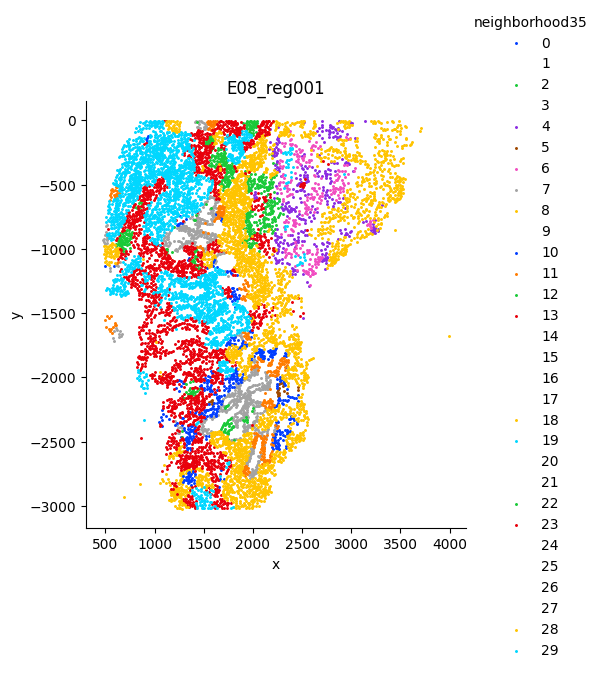

E08_reg002


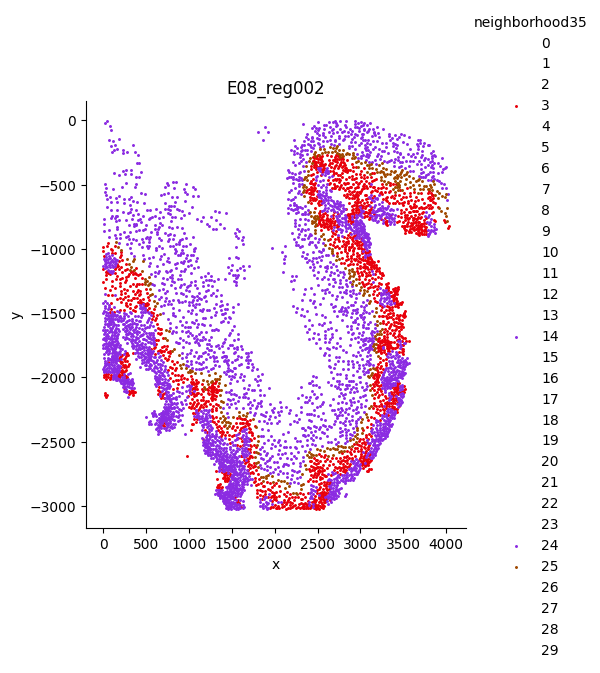

E08_reg003


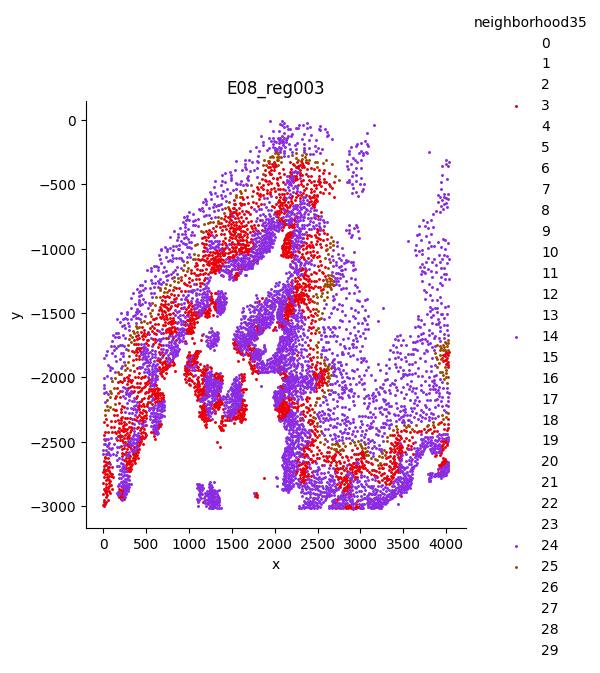

E08_reg004


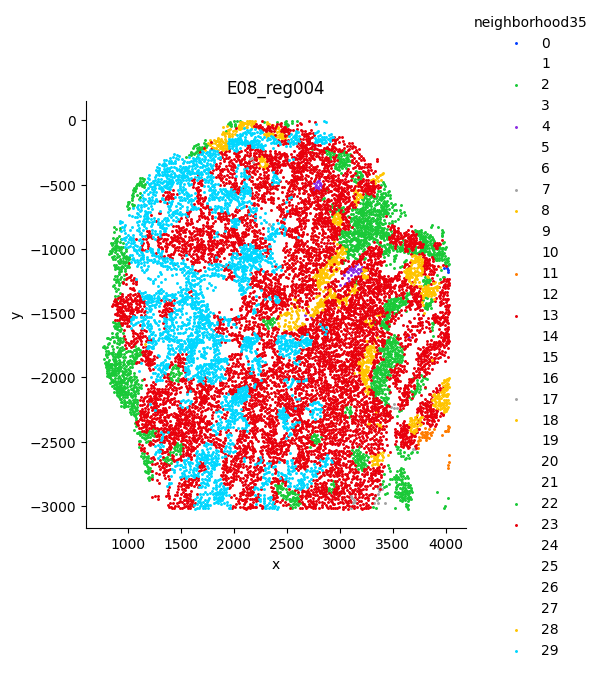

E08_reg005


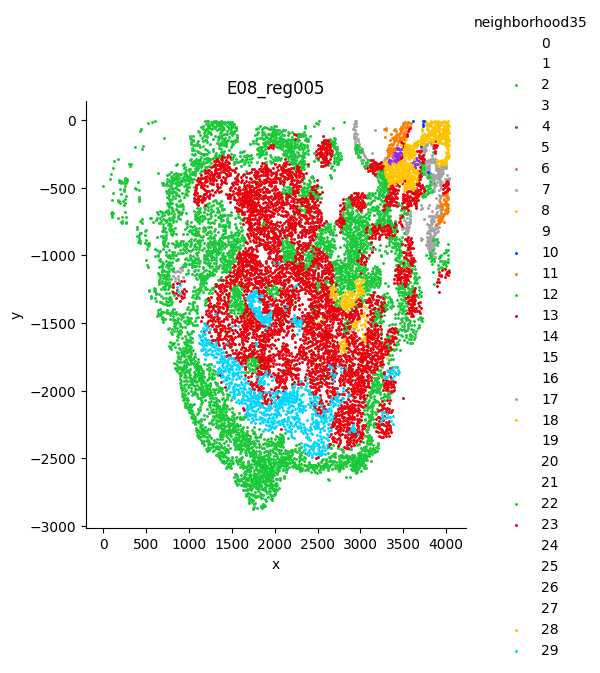

E08_reg006


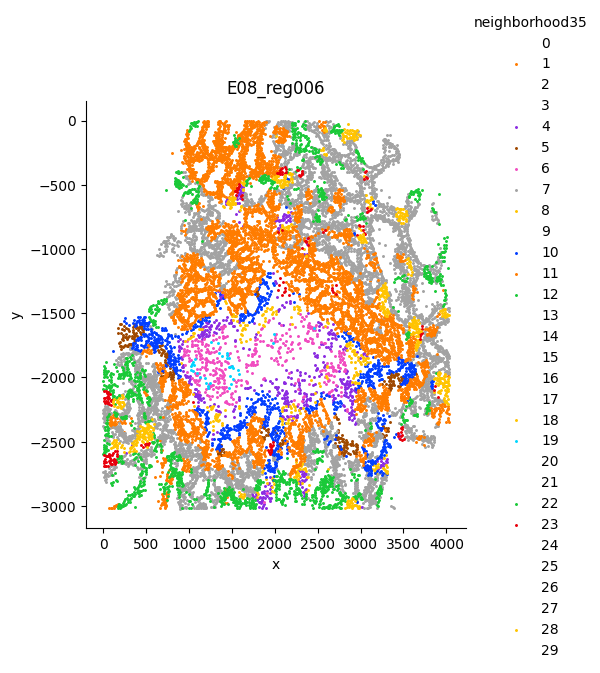

E08_reg007


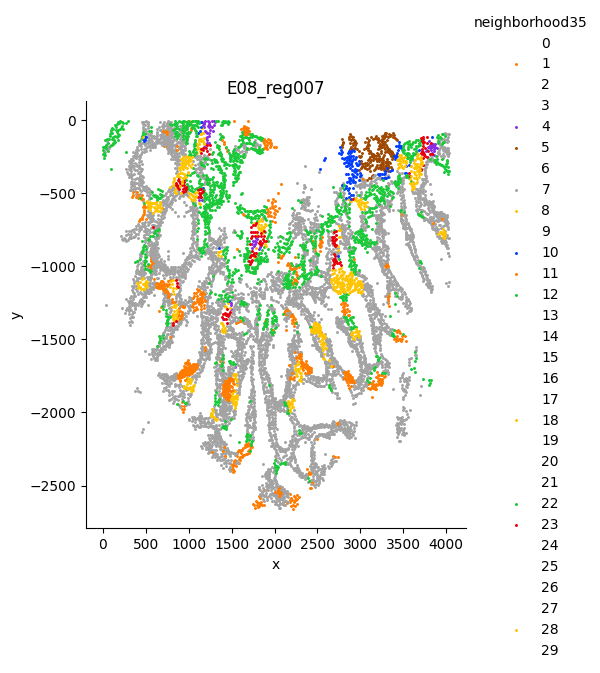

E11_reg001


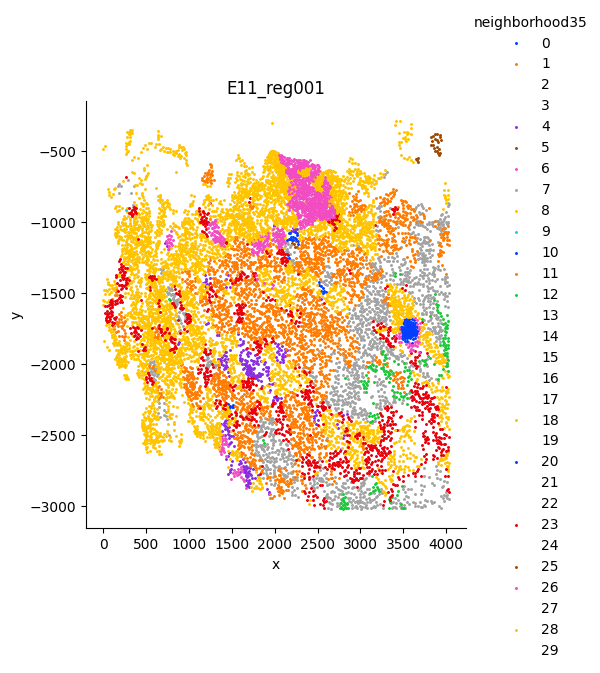

E11_reg002


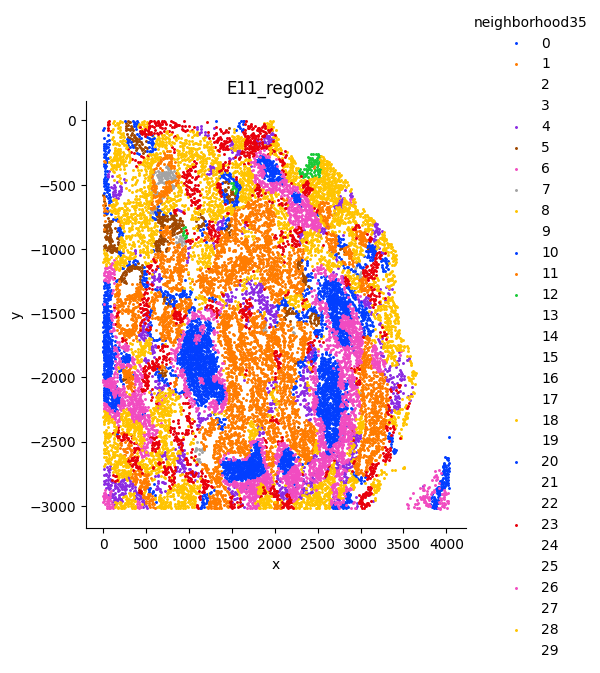

E11_reg003


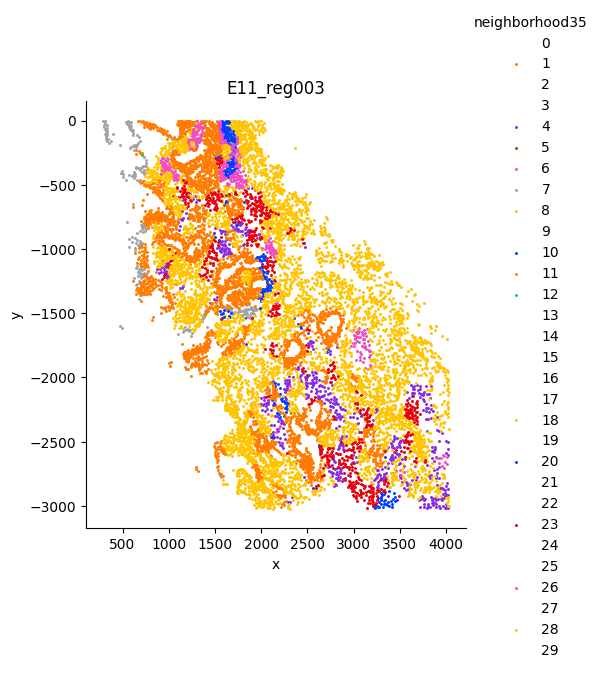

E11_reg004


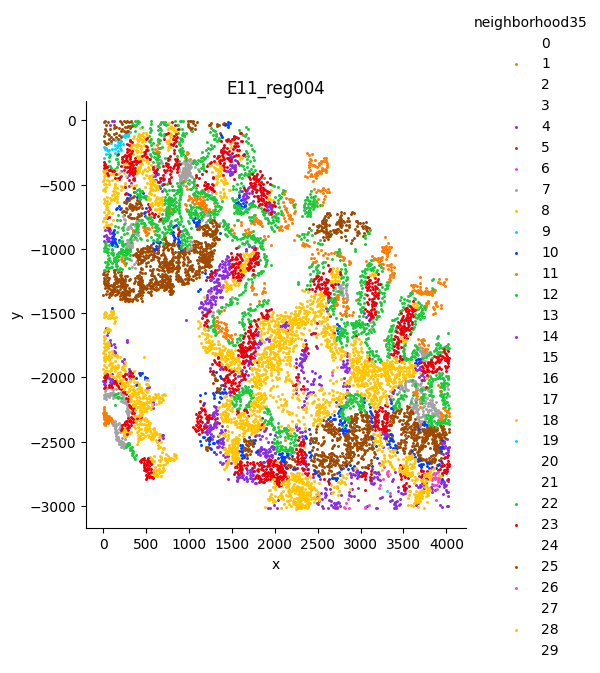

E11_reg005


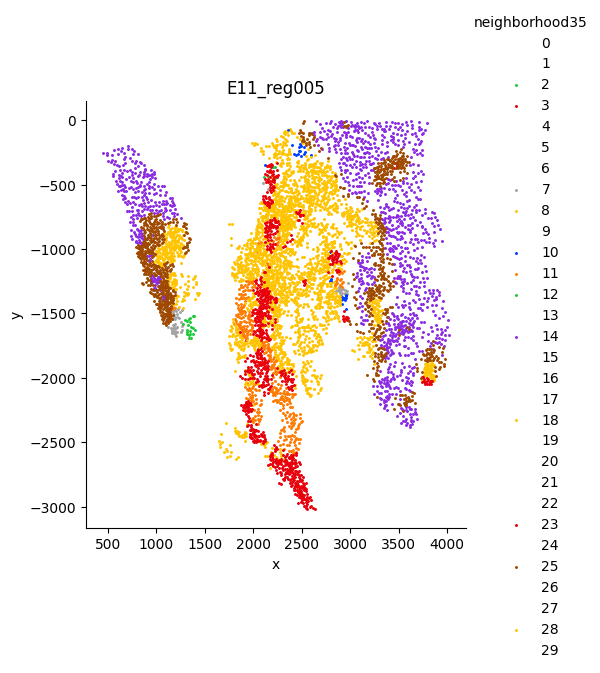

E11_reg006


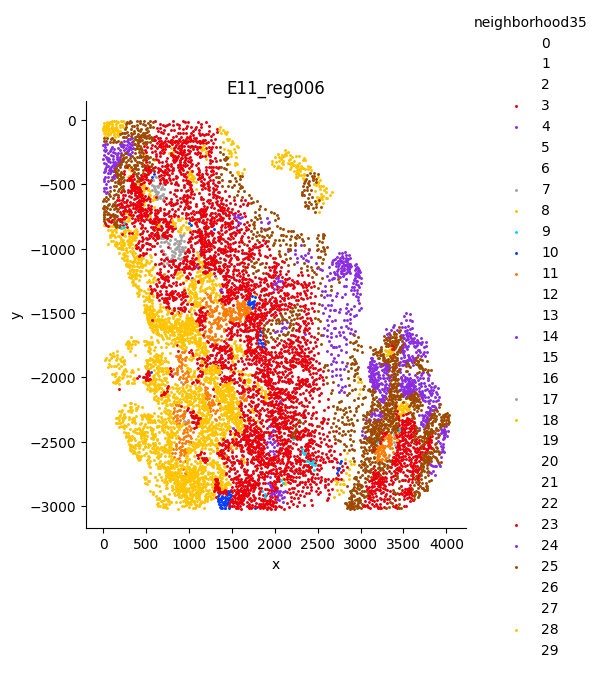

E17_reg001


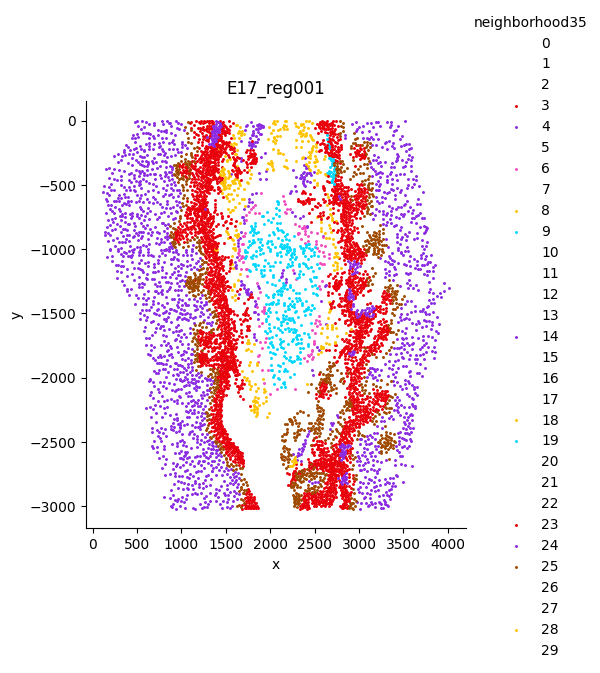

E17_reg002


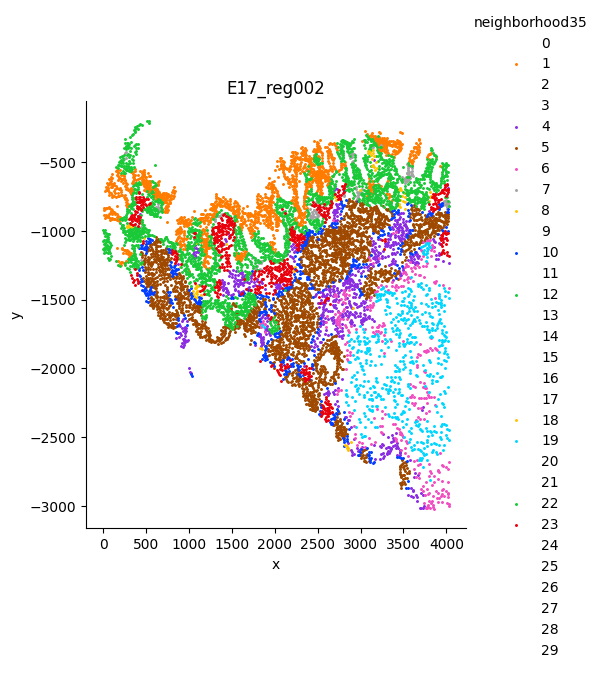

E17_reg003


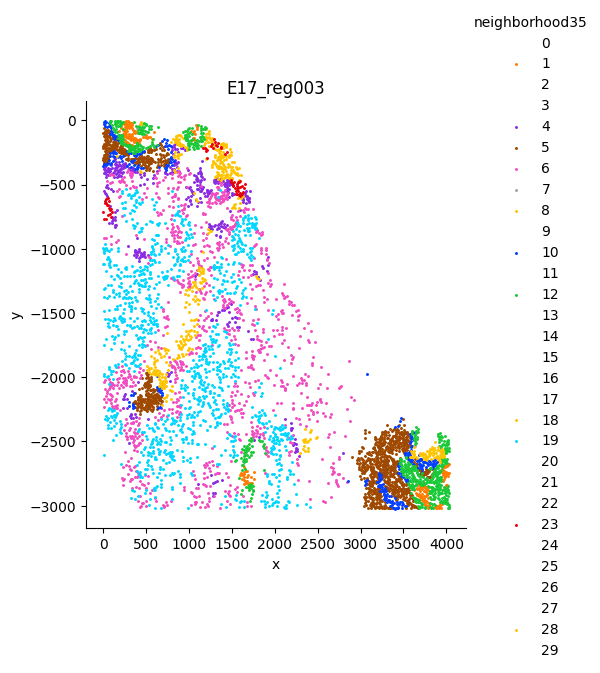

E17_reg004


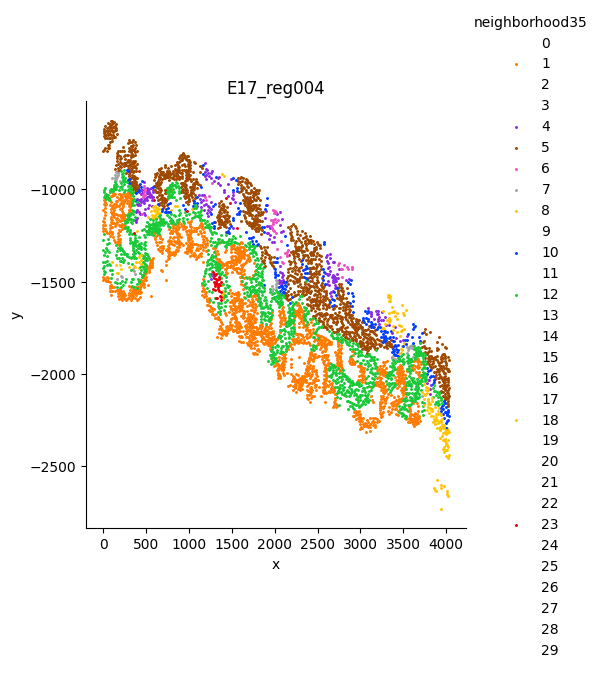

E17_reg005


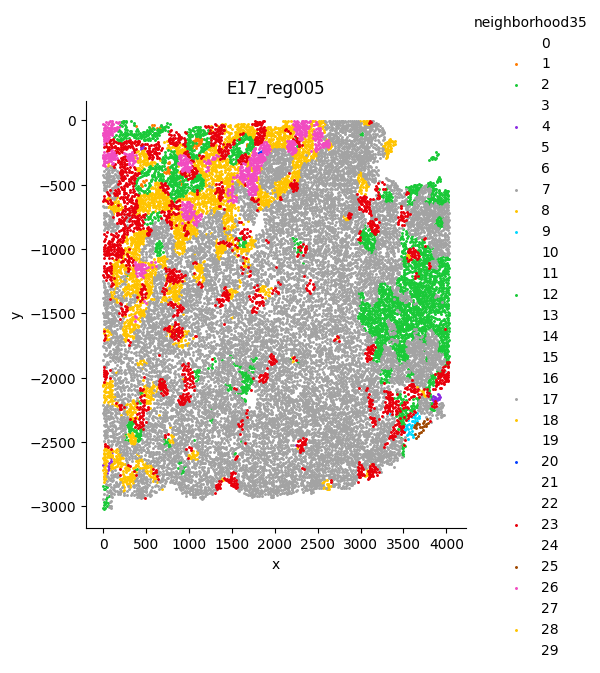

E17_reg006


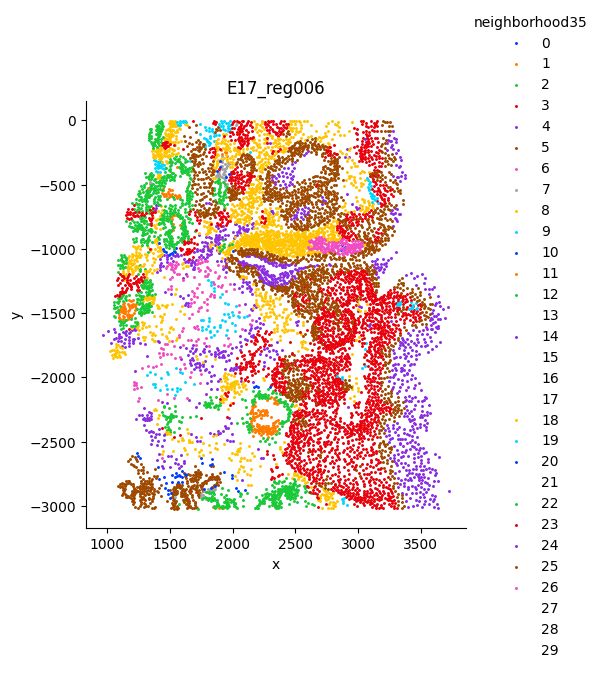

E19_reg001


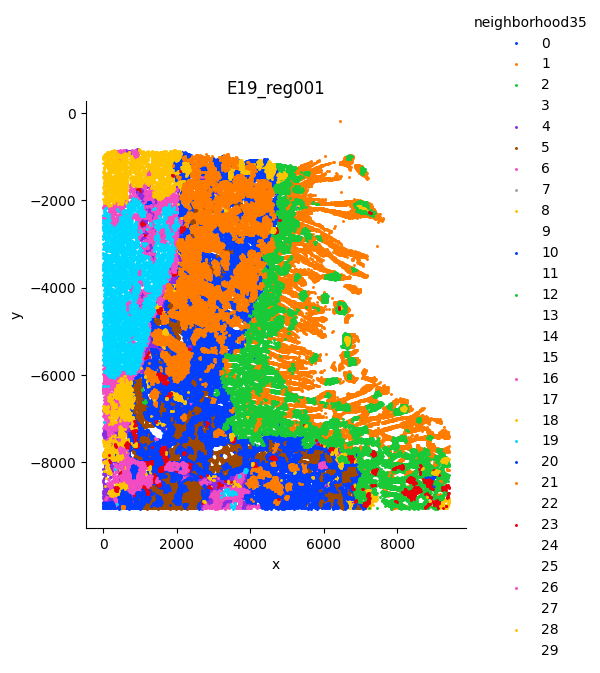

E19_reg002


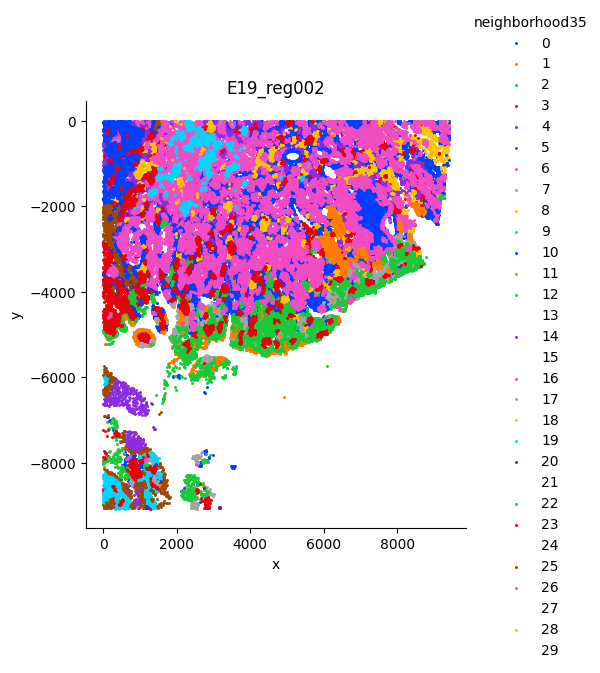

E19_reg003


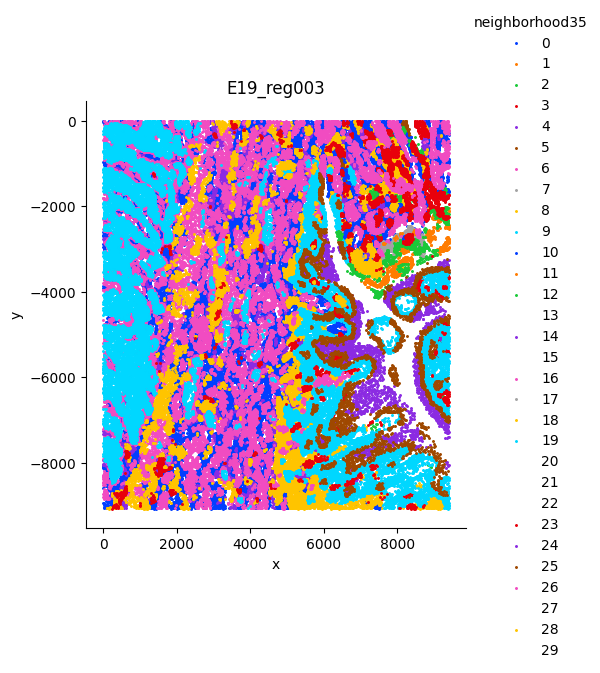

E19_reg004


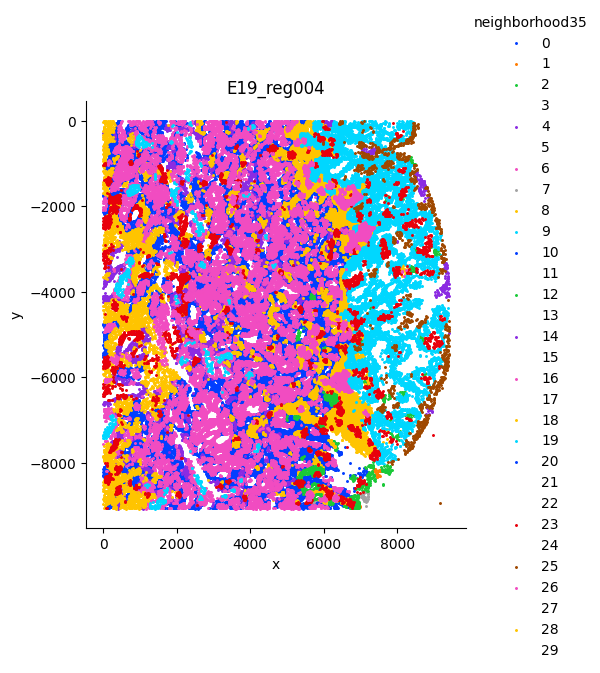

E12_reg001


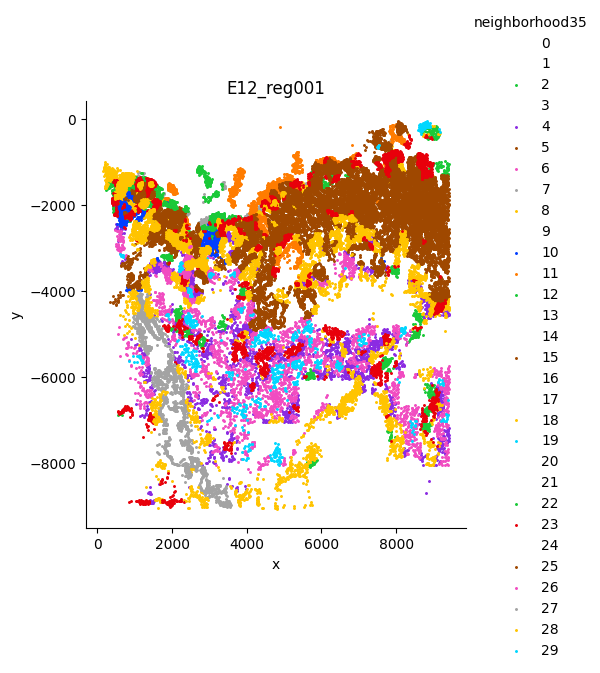

E12_reg002


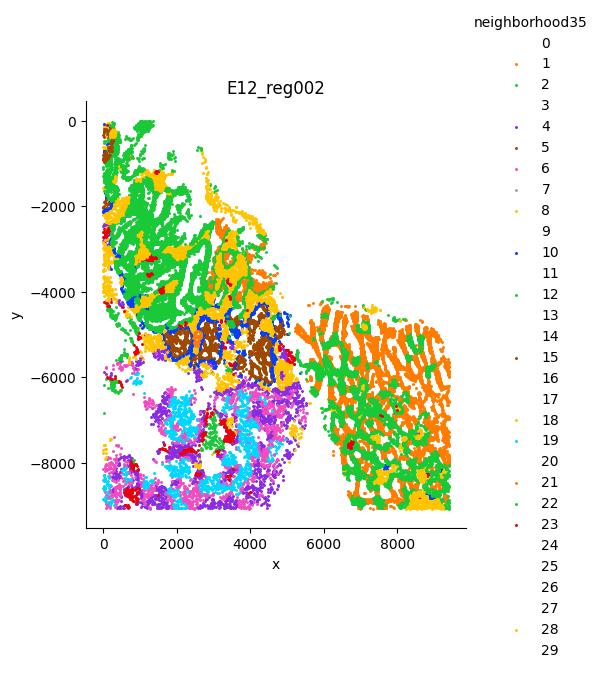

E12_reg003


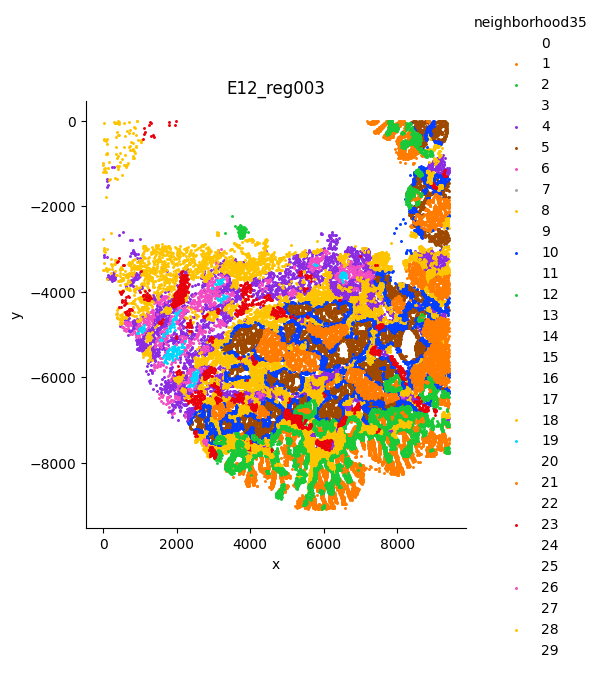

E12_reg004


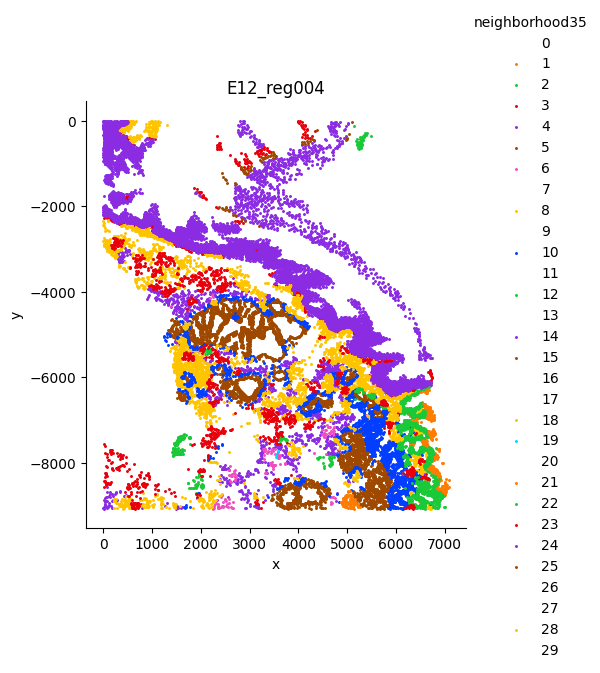

E12_reg005


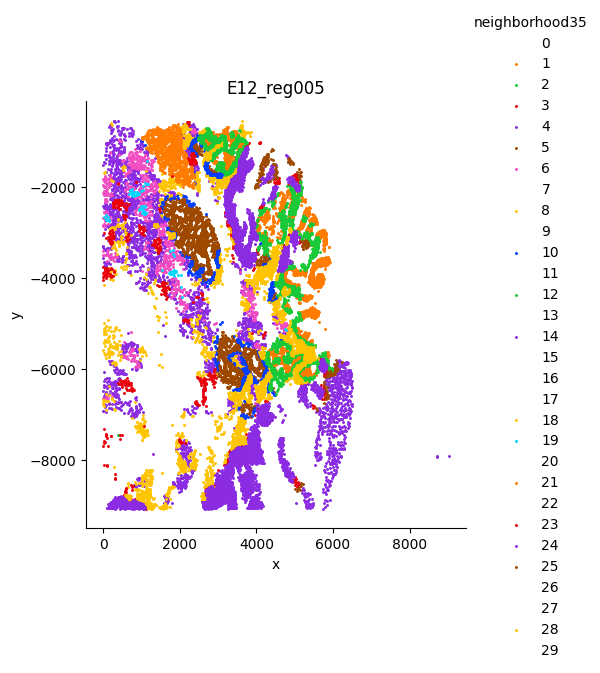

No save_path provided


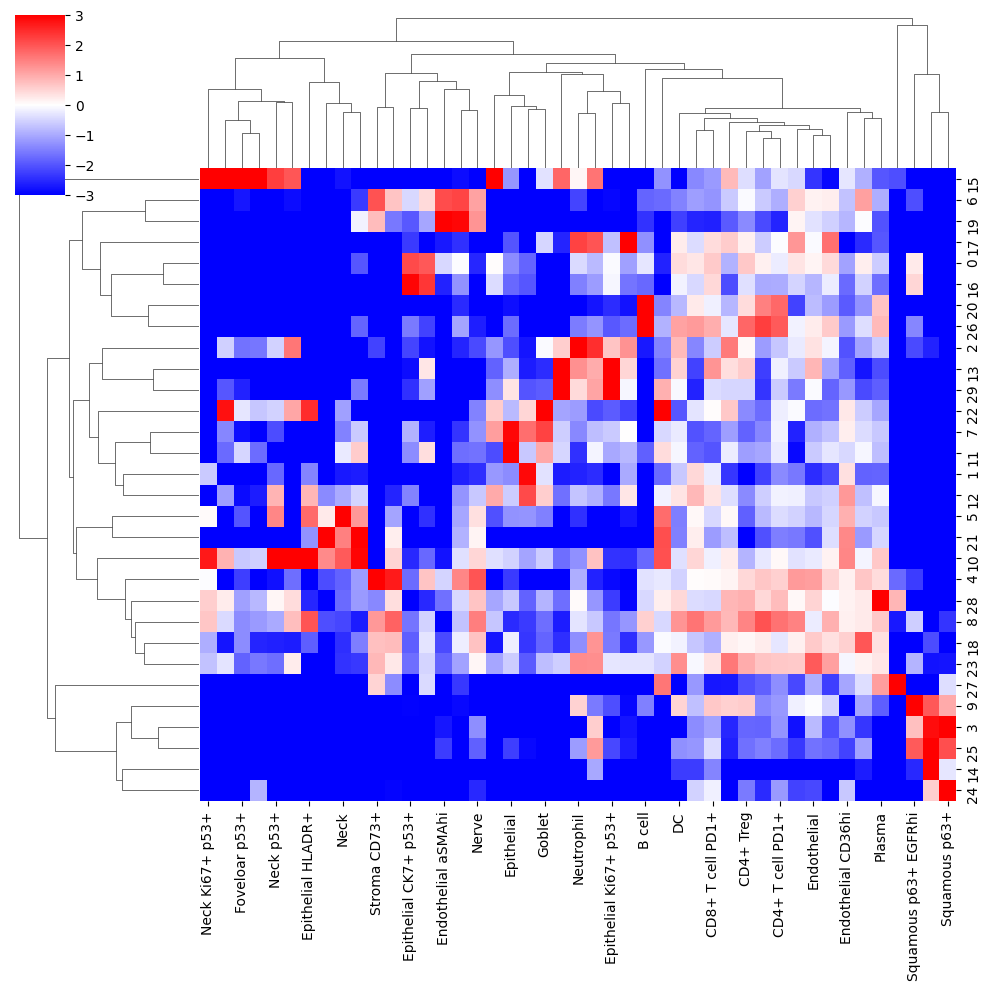

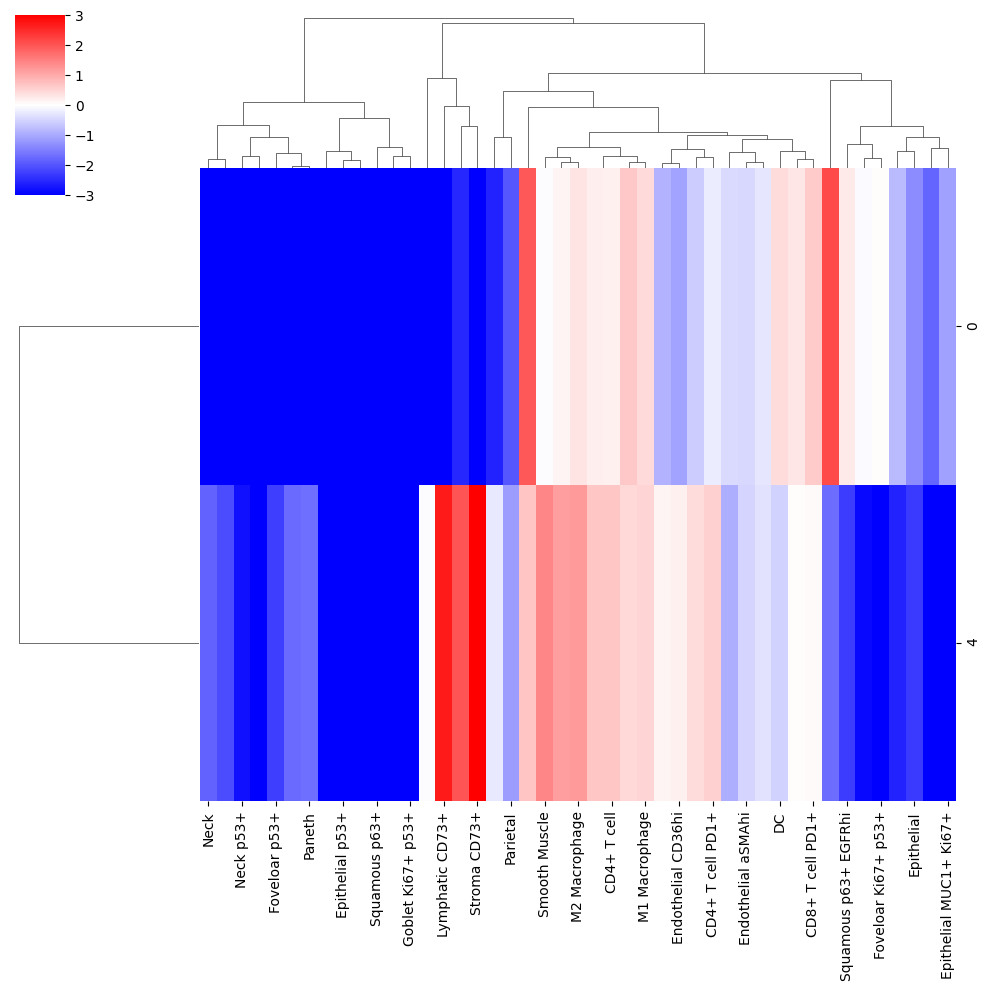

In [18]:
neighborhood_analysis(path_to_data = filepath, X = x_position_column, Y = y_position_column, reg = region_column, cluster_col = cluster_col, ks = ks, save_path = output_dir, k = k, n_neighborhoods = n_neighborhoods, save_to_csv= True)
